# <p style="background-color:white; font-family:calibri; color:brown; font-size:200%; text-align:center; border-radius:15px 25px;">Stellar Object Classification</p>


<img src="stellar.jpg" style="width: 1500px;">


<h1 style="color:brown; background-color: white; padding: 10px; font-family: arial, monospace; font-size: 36px; border-radius: 15px 25px;">
        Problem Definition
</h1>

 <h2 style="color:brown; background-color: white; padding: 10px; font-family: arial, monospace; font-size: 22px; border-radius: 15px 25px;">

Develop comprehensive machine learning models to accurately classify celestial objects as stars, galaxies, or quasars. By utilizing these models, the aims to improve astronomical cataloging, research directions, and our understanding of the universe.</h2>

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color:offwhite; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Numerical Variables Univariate Analysis](#num_uni)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Irrelevant Features Removal](#feature_removal)
    - [Step 5.2 | Missing Value Treatment](#missing)
    - [Step 5.3 | Outlier Treatment](#outlier)
    - [Step 5.4 | Dependent Variable Encoding](#encoding)
    - [Step 5.5 | Train Test Splitting](#split)
* [Step 6 | Decision Tree Model Building](#dt)
    - [Step 6.1 | DT Base Model Definition](#dt_base)
    - [Step 6.2 | DT Hyperparameter Tuning](#dt_hp)
    - [Step 6.3 | DT Model Evaluation](#dt_eval)
* [Step 7 | Random Forest Model Building](#rf)
    - [Step 7.1 | RF Base Model Definition](#rf_base)
    - [Step 7.2 | RF Hyperparameter Tuning](#rf_hp)
    - [Step 7.3 | RF Model Evaluation](#rf_eval)
* [Step 8 | SVM Model Building](#svm)
    - [Step 8.1 | SVM Base Model Definition](#svm_base)
    - [Step 8.2 | SVM Hyperparameter Tuning](#svm_hp)
    - [Step 8.3 | SVM Model Evaluation](#svm_eval)
* [Step 9 | XGBOOST Model Building](#xg)
    - [Step 9.1 | XGBOOST Base Model Definition](#xg_base)
    - [Step 9.2 | XGBOOST Hyperparameter Tuning](#xg_hp)
    - [Step 9.3 | XGBOOST Model Evaluation](#xg_eval)
* [Step 10 | Logistic Regression Model Building](#lr)
    - [Step 10.1 | Logistic Base Model Definition](#lr_base)
    - [Step 10.2 | Logistic Hyperparameter Tuning](#lr_hp)
    - [Step 10.3 | Logistic Model Evaluation](#lr_eval)
* [Step 11 | Conclusion](#conclusion)
* [Step 12 | Prediction](#prediction)

<a id="import"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 1 | Import Libraries</p>

⬆️ [Table of Contents](#contents_tabel)

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


import ipywidgets as widgets
from IPython.display import display, HTML

import warnings
warnings.filterwarnings("ignore")

<a id="read"></a>
# <p style="background-color:white ; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 2 | Read Dataset</p>

⬆️ [Table of Contents](#contents_tabel)

In [2]:
stellar = pd.read_csv("star_classification.csv")

In [3]:
stellar["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [153]:
stellar.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237688e+18,2.311624e+14,1.237650e+18,1.237660e+18,1.237660e+18,1.237670e+18,1.240000e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


<div style="border-radius:10px; padding: 15px; font-size:120%; text-align:left">

<h2 align="left"><font color=brown>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __alpha__ |  Right Ascension angle (at J2000 epoch) |
| __delta__ | Declination angle (at J2000 epoch) |
| __u__ | Ultraviolet filter in the photometric system |
| __g__ | Green filter in the photometric system |
| __r__ | Red filter in the photometric system |                     
| __i__ | Near Infrared filter in the photometric system |
| __z__ | Infrared filter in the photometric system |  
| __class__ | object class (galaxy, star or quasar object) |                      
| __redshift__ | redshift value based on the increase in wavelength |
| __plate__ | plate ID, identifies each plate in SDSS |
| __MJD__ | Modified Julian Date, used to indicate when a given piece of SDSS data was taken |                      
| __fiber_ID__ | fiber ID that identifies the fiber that pointed the light at the focal plane in each observation |              


<a id="overview"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 3 | Dataset Overview</p>

⬆️ [Table of Contents](#contents_tabel)


    
Next, I'll delve into a detailed exploration of the dataset:

<a id="basic"></a>
# <b><span style='color:brown'>Step 3.1 |</span><span style='color:brown'> Dataset Basic Information</span></b>

In [4]:
# Display a concise summary of the dataframe
stellar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),


<h2 align="left"><font color=brown>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __100000 entries__, ranging from index 0 to 99999.
    
    
* __Columns__: There are __11 columns__ in the dataset corresponding to various attributes of the stellar objects.
    
    
* __Data Types__:
    - Most of the columns (8 out of 11) are of the __float64__ data type.
    - some of the colmns (3 out of 11) are of the __int64__ data type.
    - only the class column is of the int32 data type.

    
    
* __Missing Values__: There don't appear to be any missing values in the dataset as each column has 100000 non-null entries.

<a id="num_statistics"></a>
# <b><span style='color:brown'>Step 3.2 |</span><span style='color:brown'> Summary Statistics for Numerical Variables</span></b>

Let's delve into the summary statistics for our __numerical__ attributes:

In [155]:
stellar.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237688e+18,2.311624e+14,1.237650e+18,1.237660e+18,1.237660e+18,1.237670e+18,1.240000e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


<h3 align="left"><font color=brown>Numerical Features:</font></h3>

* __`alpha`__: The average aplha of the stellar object is approximately 177.62, with the minimum being 0.005 and the maximum 359.99.
* __`delta`__: The average delta of the stellar object is about 24.13, ranging from -18.78 to 83.00.
* __`u`__: The average ultraviolet filter is approximately 21.98, with a minimum of -9999 and a maximum of 32.78.
* __`g`__: The average maximum green filter achieved is around 20.53, with a range from -9999 to 31.60.
* __`r`__: The average red filter is about 19.64, with values ranging from 9.82 to 29.57.
* __`i`__: The average near infrared filter is about 19.08, with values ranging from 9.46 to 32.14.
* __`z`__: The average Infrared filter is about 18.66, with values ranging from -9999 to 29.38.
* __`redshift`__: The average redshift value based on increase in wavelength is about 0.57, with values ranging from -0.009 to 7.011.
* __`plate`__: The average plate ID, identifies each plate in SSDS is about 19.64, with values ranging from 9.82 to 29.57.
* __`MJD`__: The average modified julian date is about 55588.64, with values ranging from 51608 to 58932.

In [156]:
stellar['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

<a id="eda"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 4 | EDA</p>

⬆️ [Table of Contents](#contents_tabel)


For our __Exploratory Data Analysis (EDA)__, we'll take it in two main steps:

>__1. Univariate Analysis__: Here, we'll focus on one feature at a time to understand its distribution and range.
>
>__2. Bivariate Analysis__: In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal: __predicting the target variable__.

<a id="univariate"></a>
# <b><span style='color:brown'>Step 4.1 |</span><span style='color:brown'> Univariate Analysis</span></b>

<a id="num_uni"></a>
## <b><span style='color:brown'>Step 4.1.1 |</span><span style='color:brown'> Numerical Variables Univariate Analysis</span></b>  
⬆️ [Table of Contents](#contents_tabel)

<Figure size 1000x1500 with 0 Axes>

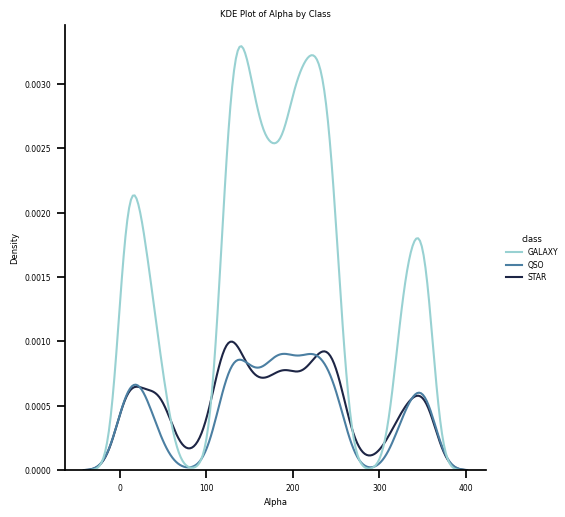

In [157]:
plt.figure(figsize=(10,15))
sns.displot(data=stellar,x="alpha",hue="class",kind="kde",palette="ch:rot=-.25,hue=1,light=.75")
plt.xlabel("Alpha")
plt.ylabel("Density")
plt.title("KDE Plot of Alpha by Class")
plt.show();

__KDE Plot of Alpha by Class__:

  X-axis (Alpha): Represents the Alpha coordinate (right ascension) in degrees.
  
  Y-axis (Density): Represents the estimated density of observations.
  
__Observation__:
   1. The STAR class shows a relatively smooth distribution with smaller peaks across the Alpha range.

   2. The GALAXY class exhibits more pronounced peaks, suggesting specific Alpha ranges where galaxies are more densely clustered.
   
   3. QSOs have a less smooth distribution, with several distinct peaks, indicating regions of higher concentration.


<Figure size 1000x1500 with 0 Axes>

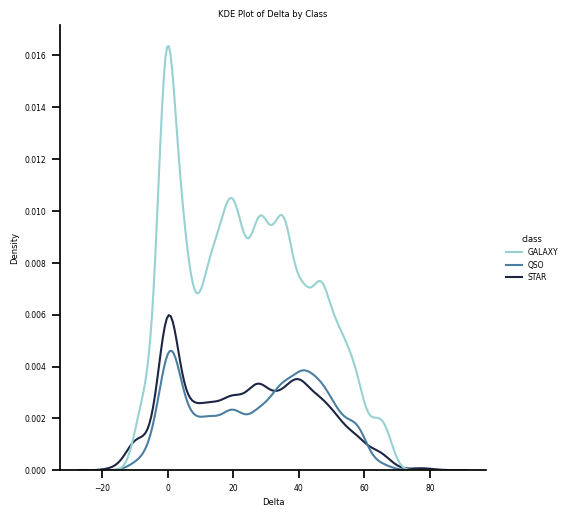

In [158]:
plt.figure(figsize=(10,15))
sns.displot(data=stellar,x="delta",hue="class",kind="kde",palette="ch:rot=-.25,hue=1,light=.75")
plt.xlabel("Delta")
plt.ylabel("Density")
plt.title("KDE Plot of Delta by Class")
plt.show();


__KDE Plot of Delta by Class__:

   X-axis (Delta): Represents the Delta coordinate (declination) in degrees.
  
   Y-axis (Density): Represents the estimated density of observations.
   
__Observation__:
   1. Similar to the Alpha plot, the STAR class has a relatively consistent density, though with a notable peak around 0-20 degrees in Delta.

   2. The GALAXY class has a sharp peak at lower Delta values, indicating a high concentration of galaxies within a specific declination range.
   
   3. QSOs display several peaks across the Delta range, highlighting areas of higher density.

      

In [10]:
# Define the continuous features
continuous_features = ['alpha', 'delta', 'u','g','r','i','z','redshift','plate']

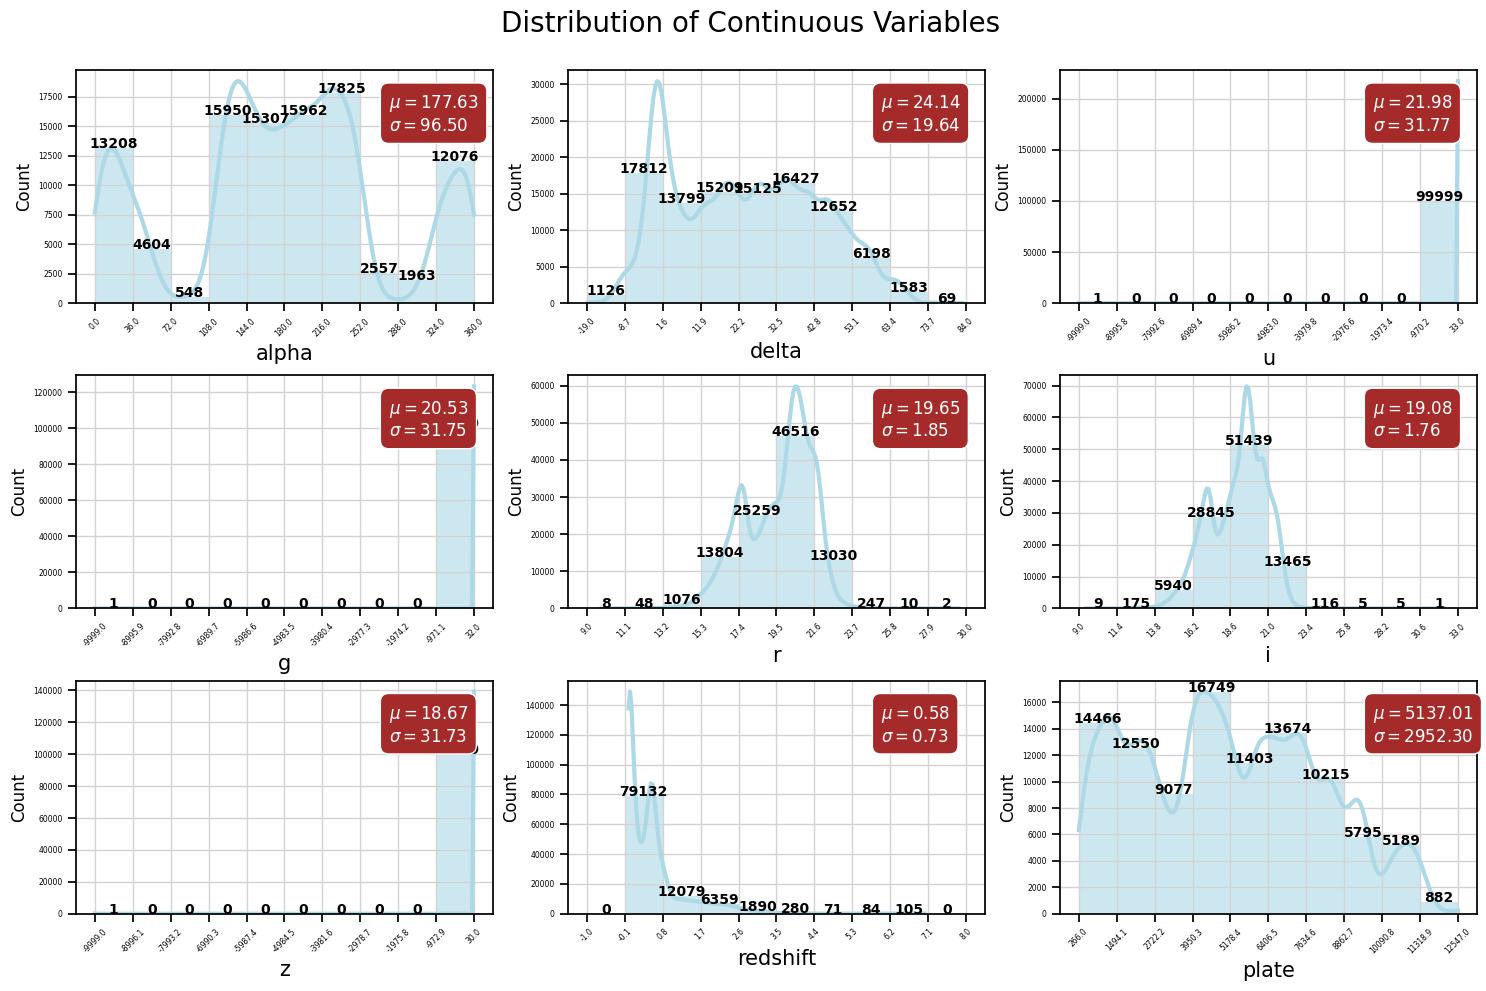

In [160]:
# Filter out continuous features for the univariate analysis
df_continuous = stellar[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='lightblue', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='brown', edgecolor='white', pad=0.5))

plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

__Alpha (α)__: Represents the right ascension in degrees. The distribution shows multiple peaks, indicating certain preferred right ascension angles where observations are more concentrated. The mean (`µ`)  is 177.63, with a standard deviation(`σ`) of 96.50.

__Delta(δ)__: Represents the declination in degrees. The distribution is skewed towards lower values, with a significant peak around 0-10 degrees.The mean (`µ`) is 177.63, with a standard deviation(`σ`) of 96.50.

__U__: This is the ultraviolet magnitude of the stellar objects. The data appears to have a major peak at the highest magnitude value, with many objects around `µ = 32.0`. The mean (`µ`) is 21.98, with a standard deviation (`σ`) of 31.77.

__G__: This magnitude represents the green part of the spectrum. The distribution is highly skewed, with a majority of the data at a high magnitude value. The mean (`µ`) is 20.53, with a standard deviation (`σ`) of 31.75.

__R__: The red magnitude of the stellar objects, showing a distribution with two peaks around `r = 14.0` and ` r = 17.0`. The mean (`µ`) is 19.65, with a standard deviation (`σ`) of 1.85.

__I__: Represents the near-infrared magnitude. The data shows a distribution similar to the `r` magnitude, with peaks around similar values. The mean (`µ`) is 19.08, with a standard deviation (`σ`) of 1.76.

__Z__: The distribution of the z-band (near-infrared) magnitude is similar to that of `g` magnitude, with a major peak at high magnitude values. The mean (`µ`) is 18.67, with a standard deviation (`σ`) of 31.73.

__Redshift__: The redshift distribution shows a strong peak around `0.0`, indicating that most observed objects have very low redshift values. The mean (`µ`) is 0.58, with a standard deviation (`σ`) of 0.73.

 __Plate__: This represents the spectroscopic plate number. The distribution indicates that certain plates were used more frequently in observations, with several prominent peaks. The mean (`µ`) is 5137.01, with a standard deviation (`σ`) of 2952.30.



In [11]:
# Filter out categorical features for the univariate analysis
categorical_features = stellar.columns.difference(continuous_features)
df_categorical = stellar[categorical_features]
categorical_features

Index(['class'], dtype='object')

<a id="num_uni"></a>
# <b><span style='color:brown'>Step 4.1.2 |</span><span style='color:brown'> Categorical Variables Univariate Analysis</span></b> 
⬆️ [Table of Contents](#contents_tabel) 

### Count Plot of class: This plot simply counts the number of occurrences for each stellar class, giving an overview of the class distribution in your dataset.

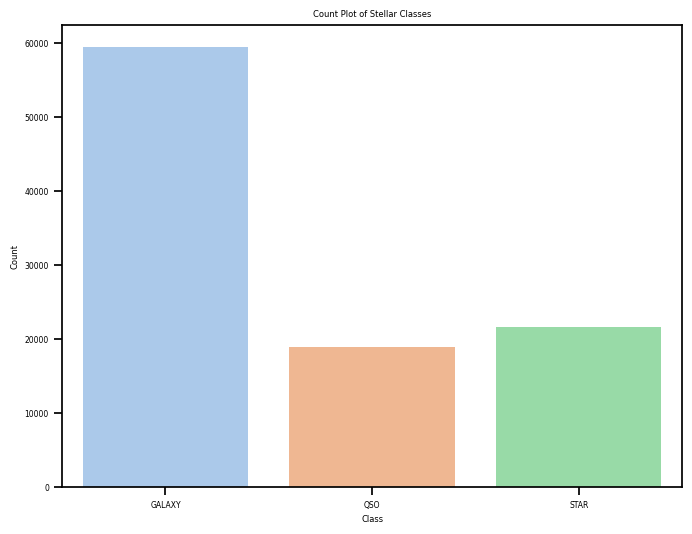

In [162]:
# Count plot of classes
plt.figure(figsize=(8, 6))
sns.countplot(data=stellar, x='class', palette='pastel')
plt.title('Count Plot of Stellar Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

GALAXY: This class has the highest count, with nearly 59,445 instances, indicating that galaxies dominate the dataset.

QSO: This class has around 18,961 instances, representing quasi-stellar objects.

STAR: This class also has approximately 21,594 instances, similar to the QSO class.



<a id="bivariate"></a>
# <b><span style='color:brown'>Step 4.2 |</span><span style='color:brown'> Bivariate Analysis</span></b>
⬆️ [Table of Contents](#contents_tabel)

### 4.2.1 Scatter Plot of alpha vs delta: This shows the distribution of stars in the sky based on their right ascension (alpha) and declination (delta), colored by their stellar class. This can reveal whether certain classes of stars are clustered in specific regions.

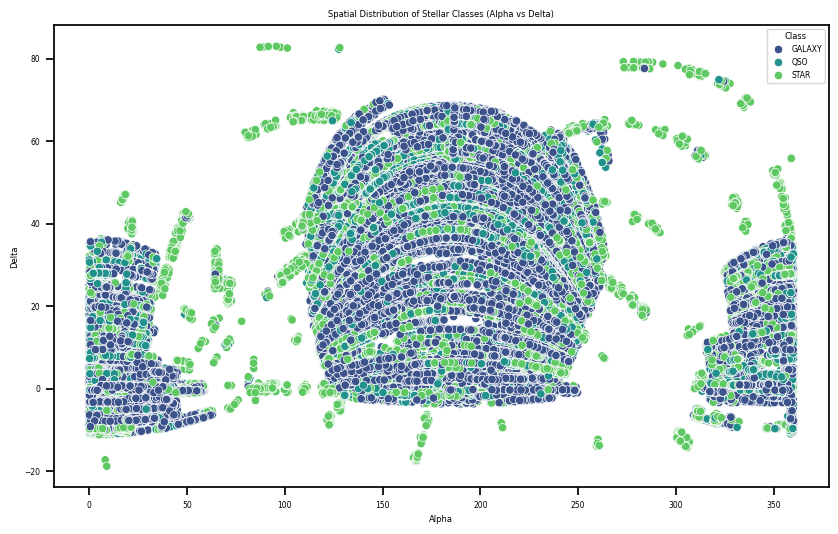

In [163]:
#  Right Ascension angle (at J2000 epoch)
#  Declination angle (at J2000 epoch)
#  Sloan Digital Sky Survey
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stellar, x='alpha', y='delta', hue='class', palette='viridis')
plt.title('Spatial Distribution of Stellar Classes (Alpha vs Delta)')
plt.xlabel('Alpha')
plt.ylabel('Delta')
plt.legend(title='Class')
# plt.grid(True)
plt.show()

#### Axes:
X-axis (Alpha): Represents the right ascension (`α`) in degrees, ranging from 0 to 360. This is essentially the celestial equivalent of longitude.

Y-axis (Delta): Represents the declination (`δ`) in degrees, ranging from -20 to 80. This is the celestial equivalent of latitude.

#### Spatial Distribution:

GALAXY: The blue dots dominate the central region of the plot, forming dense bands and clusters. This suggests that galaxies are the most widely observed objects in this dataset and are spread across a wide range of right ascension and declination.

QSO: The orange dots are more sparsely distributed and tend to appear interspersed with galaxies, indicating that QSOs are less frequent but still spread across the sky.

STAR: The green dots, representing stars, are distributed throughout the plot but are not as densely clustered as galaxies. They are more evenly spread out across the celestial sphere.


### 4.2.2 Pair Plot of Magnitudes: This visualizes relationships between different magnitude bands (u, r, g, i, z) and how these vary across stellar classes. It can highlight clusters or trends specific to each class.

Magnitudes measures brightness of star, planet or galaxy.

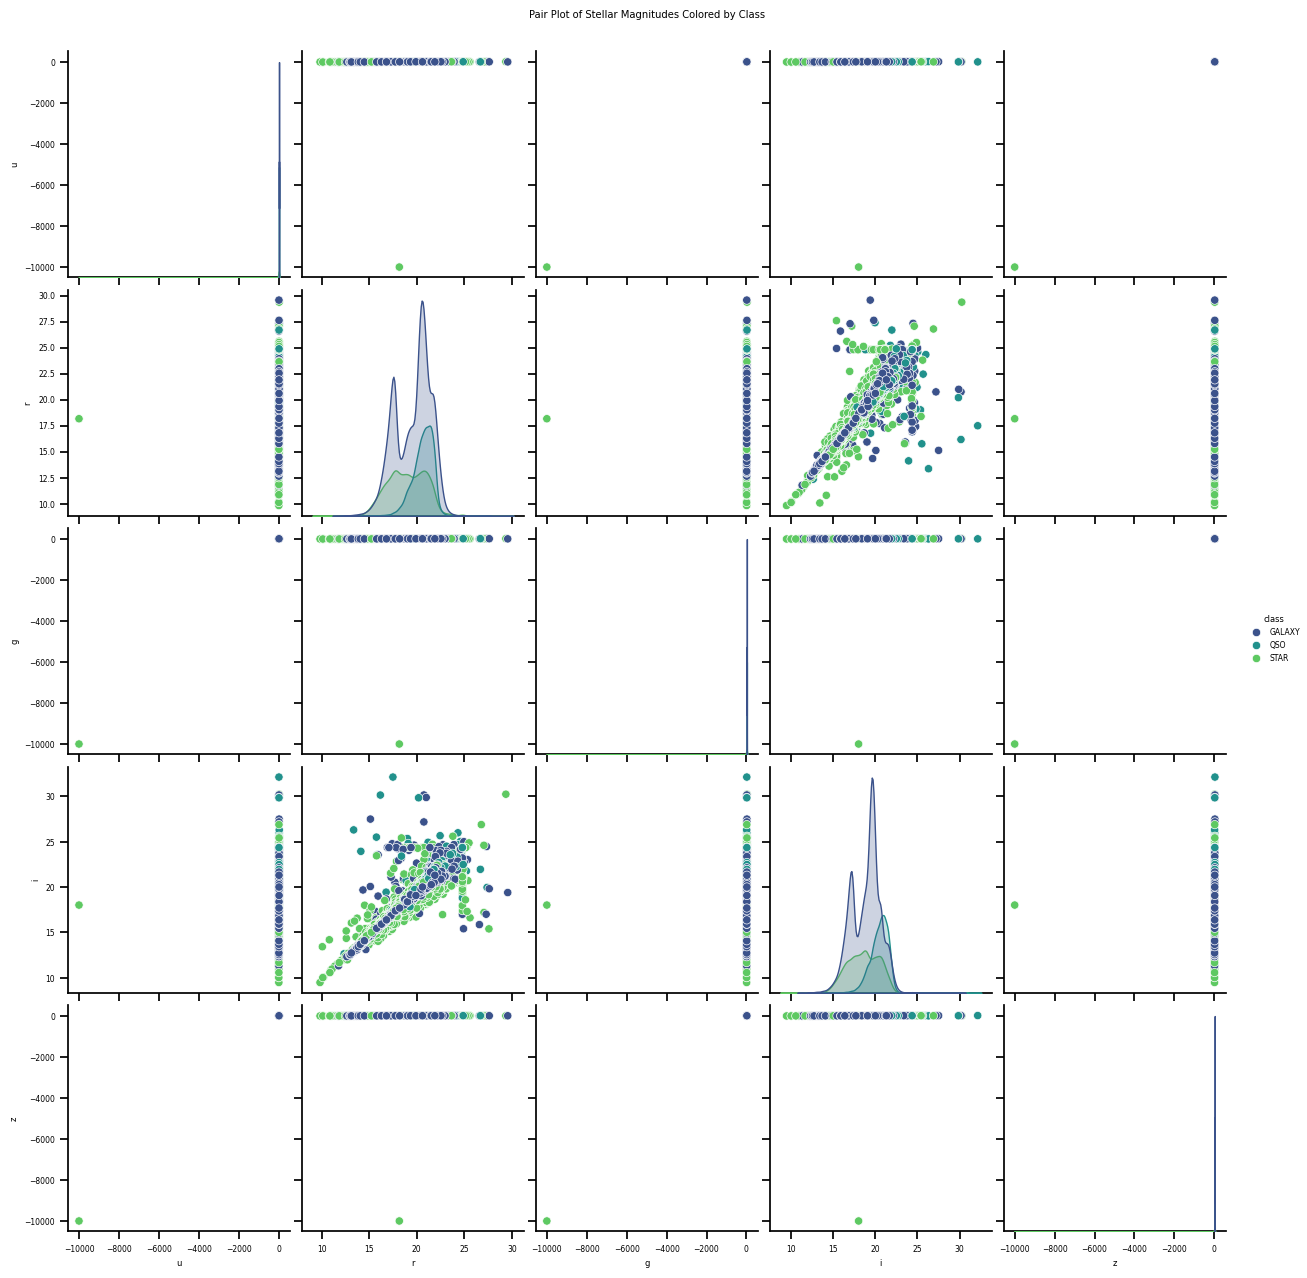

In [164]:
# Pair plot of magnitudes
sns.pairplot(stellar, vars=['u', 'r', 'g', 'i', 'z'], hue='class', palette='viridis')
plt.suptitle('Pair Plot of Stellar Magnitudes Colored by Class', y=1.02)
plt.show()


__Pairwise Relationship__:
Scatter Plots (Off-diagonal): The scatter plots show pairwise relationships between the different magnitudes. For example, the plot at the intersection of row `r` and column `g` shows the relationship between `r` and `g` magnitudes.

Distribution Plots (Diagonal): The diagonal plots show the distribution of each magnitude. For example, the plot in the `r` row and column shows the distribution of the `r` magnitude for each class.

__Observation__:

The scatter plots often show a strong correlation between certain magnitudes (e.g., `r` vs `i`), where the points form a diagonal line. This indicates that as one magnitude increases, the other tends to increase as well.

The distributions along the diagonal reveal the spread and density of the magnitude values for each class. For example, the `r` magnitude shows distinct peaks in its distribution, which might correspond to different types of objects or observational biases.

There are outliers visible in the scatter plots, particularly for the `u`, `g`, and  `z` magnitudes, where some points lie far from the main clusters. These outliers could represent rare or unique observations. 


### 4.2.3 Box Plot of Magnitudes: This compares the spread and central tendency of different magnitudes across classes. It can show which classes are generally brighter or dimmer in specific bands.

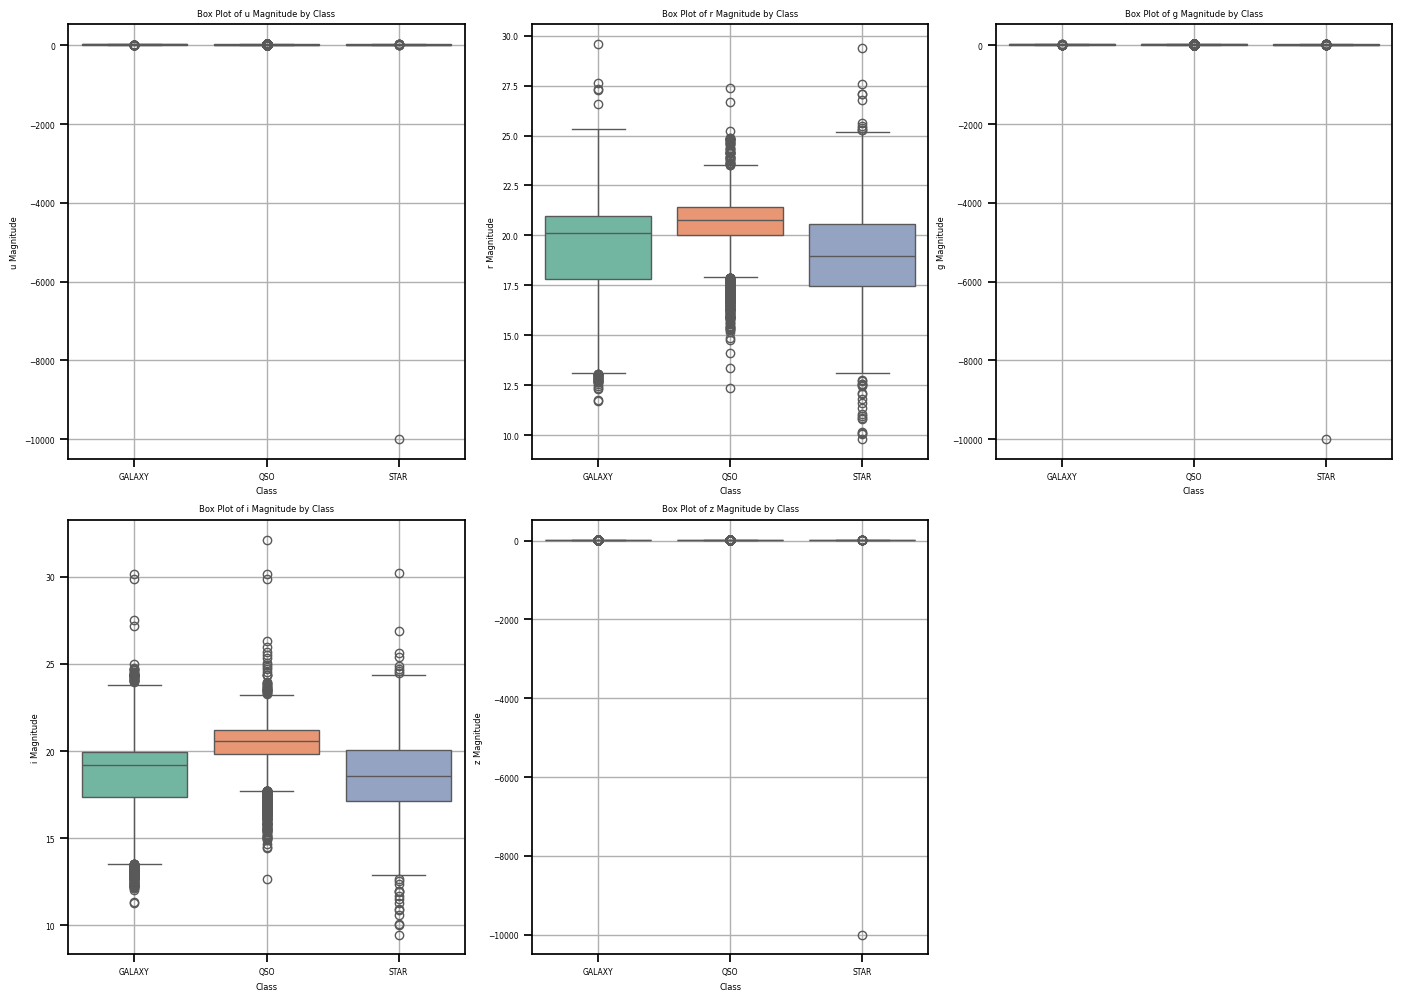

In [165]:
# Box plots of magnitudes across classes
plt.figure(figsize=(14, 10))
for i, magnitude in enumerate(['u', 'r', 'g', 'i', 'z']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=stellar, x='class', y=magnitude, palette='Set2')
    plt.title(f'Box Plot of {magnitude} Magnitude by Class')
    plt.xlabel('Class')
    plt.ylabel(f'{magnitude} Magnitude')
    plt.grid(True)
plt.tight_layout()
plt.show()

__Axes__:

The x-axis for each plot represents the different stellar classes: GALAXY, QSO, and STAR.

The y-axis represents the magnitude values for the respective photometric filter (`u`, `g`, `r`, `i`, `z`).

__Box Plot Interpretation__:

Each box plot shows the distribution of magnitude values for each class.

The central line in each box represents the median value.

The edges of the box represent the interquartile range (IQR), which includes the middle 50% of the data

The "whiskers" extend to the smallest and largest values within 1.5 times the IQR from the first and third quartiles.

Data points outside the whiskers are considered outliers and are plotted as individual points.


### 4.2.4 Redshift Distribution: This plot provides insight into how redshift (which can indicate the distance and velocity of objects) is distributed among different stellar classes. It can reveal if certain classes are generally more distant or moving faster.

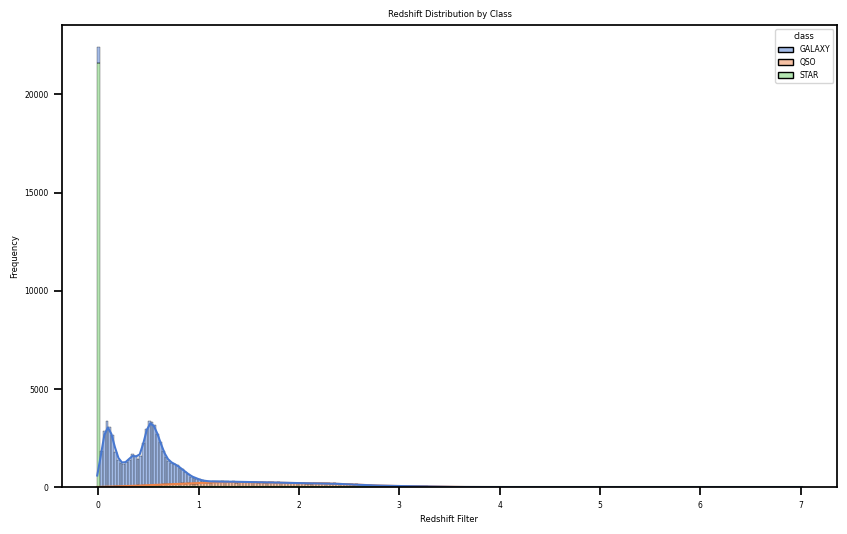

In [166]:
# Histogram and KDE of redshift by class
plt.figure(figsize=(10, 6))
sns.histplot(data=stellar, x='redshift', hue='class', kde=True, multiple='stack', palette='muted')
plt.title('Redshift Distribution by Class')
plt.xlabel('Redshift Filter')
plt.ylabel('Frequency')
# plt.grid(True)
plt.show()

__Axes__:

The x-axis represents the redshift values.

The y-axis represents the frequency or count of observations for each redshift value.

__Class-wise Observation__:

GALAXY: The distribution is wider and extends across a range of redshift values, peaking around 0.2 and gradually tapering off.

QSO: The distribution for QSOs is more spread out, with a notable presence in the higher redshift range, especially between 0.5 and 2, reflecting the nature of QSOs as very distant objects.

STAR: The STAR class has an overwhelming concentration at a redshift of 0, indicating that the stars observed are relatively close and exhibit little to no redshift.



### 4.2.5 Violin Plot of redshift Across class: A violin plot provides a deeper understanding of the distribution of redshift for each class, combining the information of a box plot with a kernel density estimate.

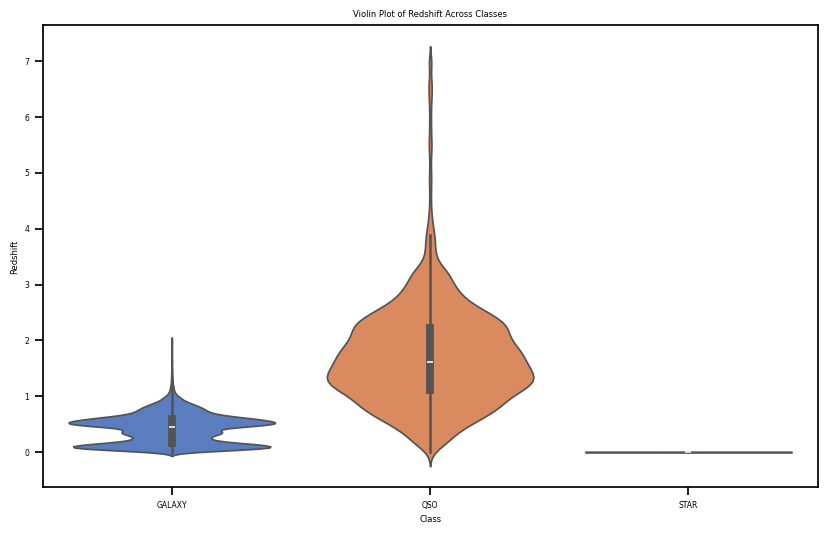

In [167]:
# Violin plot of redshift across classes
plt.figure(figsize=(10, 6))
sns.violinplot(data=stellar, x='class', y='redshift', palette='muted')
plt.title('Violin Plot of Redshift Across Classes')
plt.xlabel('Class')
plt.ylabel('Redshift')
# plt.grid(True)
plt.show()

### 4.2.6 Facet Grid of r vs i Colored by class: A Facet Grid can show how the relationship between r and i magnitudes varies across different classes in separate subplots.

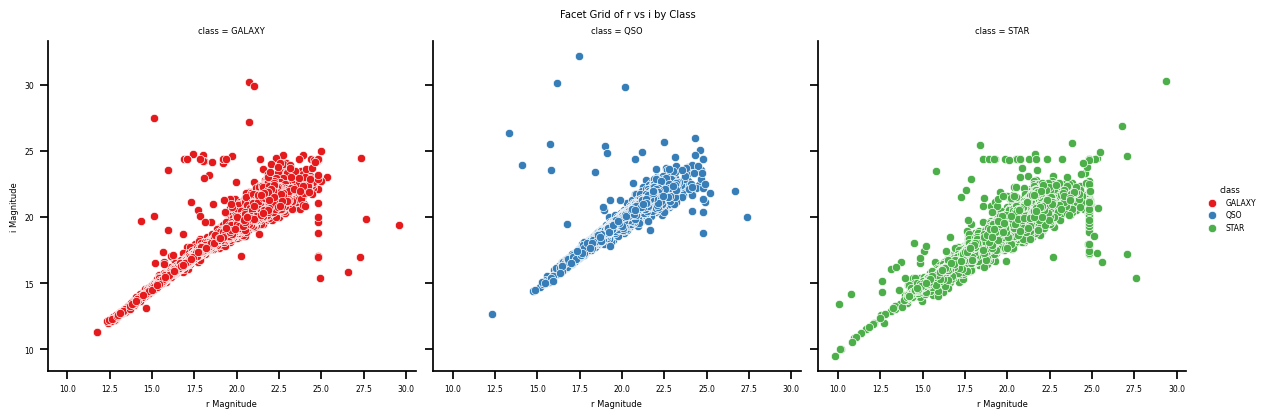

In [168]:
# Facet grid of r vs i colored by class
g = sns.FacetGrid(stellar, col='class', hue='class', col_wrap=3, height=4, palette='Set1')
g.map(sns.scatterplot, 'r', 'i')
g.add_legend()
g.set_axis_labels('r Magnitude', 'i Magnitude')
g.fig.suptitle('Facet Grid of r vs i by Class', y=1.02)
plt.show()

The data points in each plot represent individual observations within their respective classes, highlighting distinct patterns or clusters, with an upward trend visible in each class. The scatter plots help visualize how these magnitudes are distributed and related within each class.

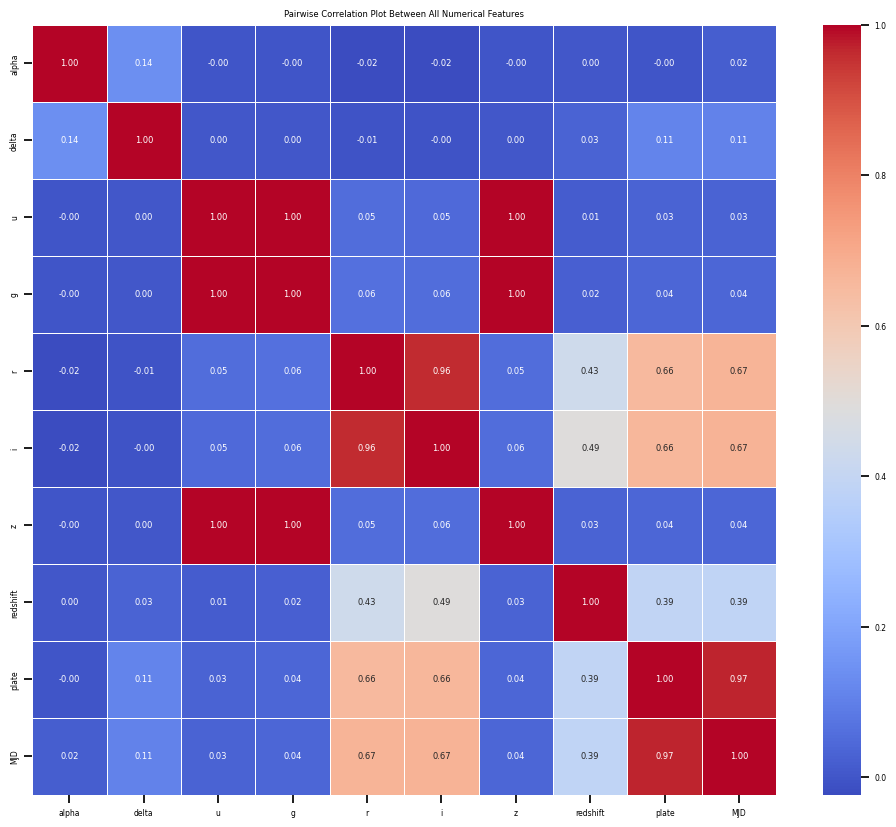

In [169]:
numeric_data = stellar[["alpha","delta","u","g","r","i","z","redshift","plate","MJD"]]

# Compute the correlation matrix 
corr = numeric_data.corr()

# Pairwise correlation plot between all features
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pairwise Correlation Plot Between All Numerical Features')
plt.show()

The image is a heatmap that displays a pairwise correlation matrix of numerical features from a dataset. 

alpha: Appears to have weak correlations with all other features.

delta: Also shows weak correlations with other features.

u, g, r, i, z: These could represent different measurements or variables. The correlations between them are particularly strong between:

1. r and i (0.96)

2. u and g (1.00)

3. g and r (0.06)

4. u and z (1.00)
    
redshift: Shows moderate correlations with r (0.43) and i (0.49).

plate and MJD: These show strong correlations with each other (0.97).

<a id="preprocessing"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 5 | Data Preprocessing</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="feature_removal"></a>
# <b><span style='color:brown'>Step 5.1 |</span><span style='color:brown'> Irrelevant Features Removal</span></b>
⬆️ [Table of Contents](#contents_tabel)

In [5]:
if "obj_ID" in stellar.columns.values:
    stellar.drop(["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "fiber_ID","MJD"],axis=1,inplace=True)
stellar 

,alpha,delta,u,g,r,i,z,class,redshift,plate
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,5812
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,10445
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,4576
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,9149
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,6121
...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000,9374
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895,7626
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366,2764
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040,6751


<a id="missing"></a>
# <b><span style='color:brown'>Step 5.2 |</span><span style='color:brown'> Missing Value Treatment</span></b>
⬆️ [Table of Contents](#contents_tabel)

In [6]:
stellar.isnull().sum()

alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
dtype: int64

Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

<a id="outlier"></a>
# <b><span style='color:brown'>Step 5.3 |</span><span style='color:brown'> Outlier Treatment</span></b>
⬆️ [Table of Contents](#contents_tabel)

I am going to check for outliers using the __IQR method__ for the continuous features:

In [12]:
continuous_features

['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate']

In [13]:
Q1 = stellar[continuous_features].quantile(0.25)
Q3 = stellar[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((stellar[continuous_features] < (Q1 - 1.5 * IQR)) | (stellar[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified 

alpha          0
delta          0
u             56
g             99
r            132
i            198
z            320
redshift    8990
plate          0
dtype: int64

Upon identifying outliers for the specified continuous features, we found the following:

* __`alpha`__: No outliers
* __`delta`__: No outliers
* __`u`__: 56 outliers
* __`g`__: 99 outliers
* __`r`__: 132 outlier
* __`i`__: 198 outliers
* __`z`__: 320 outlier
* __`redshift`__: 8990 outliers
* __`plate`__: No outliers

<h3 align="left"><font color=brown>Sensitivity to Outliers:</font></h3>

* __SVM (Support Vector Machine)__: SVMs can be sensitive to outliers. While the decision boundary is determined primarily by the support vectors, outliers can influence which data points are chosen as support vectors, potentially leading to suboptimal classification.
    
    
* __Decision Trees (DT) and Random Forests (RF)__: These tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.
    
    
* __AdaBoost:__ This ensemble method, which often uses decision trees as weak learners, is generally robust to outliers. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.

<h3 align="left"><font color=brown>Approaches for Outlier Treatment:</font></h3>
    
* __Removal of Outliers__: Directly discard data points that fall outside of a defined range, typically based on a method like the Interquartile Range (IQR).
    
* __Impute Outliers__: We can impute outliers using mean(), median() or mode()

<h3 align="left"><font color=brown>Conclusion:</font></h3>

Given __the nature of the algorithms (especially SVM)__ and __the small size of our dataset__, direct removal of outliers might not be the best approach.<br>
Instead, __we'll focus on applying transformations like Box-Cox in the subsequent steps__ to reduce the impact of outliers and make the data more suitable for modeling.

In [26]:
# Imputing outliers with median  
def replace_outliers_with_median(df):
    for column in stellar.columns:
        if stellar[column].dtype in ['int64', 'float64']:  # Apply only to numerical columns
            Q1 = stellar[column].quantile(0.25  )
            Q3 = stellar[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with median
            median = stellar[column].median()
            stellar[column] = stellar[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    
    return df

# Apply the function to the loaded DataFrame
df_imputed = replace_outliers_with_median(stellar)

In [27]:
Q1 = stellar[continuous_features].quantile(0.25)
Q3 = stellar[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((stellar[continuous_features] < (Q1 - 1.5 * IQR)) | (stellar[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified 

alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
redshift    0
plate       0
dtype: int64

<a id="encoding"> </a>
# <b><span style='color:brown'>Step 5.4 |</span><span style='color:brown'> Dependent Variable Encoding</span></b>
⬆️ [Table of Contents](#contents_tabel) 

In [28]:
encoder=LabelEncoder()
stellar['class']=encoder.fit_transform(stellar['class'])

In [29]:
# 0: GALAXY
# 1: QSO
# 2: STAR
stellar['class'].head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    0
9    2
Name: class, dtype: int64

<a id="split"> </a>
# <b><span style='color:brown'>Step 5.5 |</span><span style='color:brown'> Train-Test Splitting</span></b>
⬆️ [Table of Contents](#contents_tabel)

In [30]:
X =  stellar.drop(['class'], axis = 1)
y = stellar['class'].values

In [31]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(X)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X , y , test_size=0.30, random_state=42)


In [34]:
print('x_train', x_train.shape)

x_train (70000, 9)


In [35]:
print('x_test', x_test.shape)


x_test (30000, 9)


In [36]:
print('y_train', y_train.shape)


y_train (70000,)


In [37]:
print('y_test', y_test.shape)

y_test (30000,)


<a id="dt"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 6 | Decision Tree Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="dt_base"></a>
# <b><span style='color:brown'>Step 6.1 |</span><span style='color:brown'> DT Base Model Definition</span></b>

In [185]:
#Decision Tree
# random state: same randomization every time you run the code
dt = DecisionTreeClassifier(random_state=45)

<a id="dt_hp"></a>
# <b><span style='color:brown'>Step 6.2 |</span><span style='color:brown'> DT  Hyperparameter Tuning</span></b>
⬆️ [Table of Contents](#contents_tabel)

In [38]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='accuracy', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest accuracy is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    # to find optimal combination of hyperparameter for models
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [187]:
# Hyperparameter grid for DT
# gini: Reduce the impurity score from the root node.
# entropy: Measures randomness in the information being processed, it uses log method which makes it more complex.
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [188]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt, param_grid_dt, x_train, y_train)

In [189]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


<a id="dt_eval"></a>
# <b><span style='color:brown'>Step 6.3 |</span><span style='color:brown'> DT Model Evaluation</span></b>
⬆️ [Table of Contents](#contents_tabel)

### Now let's evaluate our DT model performance on the test datasets:

In [190]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     17845
           1       0.87      0.68      0.76      5700
           2       1.00      1.00      1.00      6455

    accuracy                           0.92     30000
   macro avg       0.92      0.88      0.90     30000
weighted avg       0.92      0.92      0.91     30000



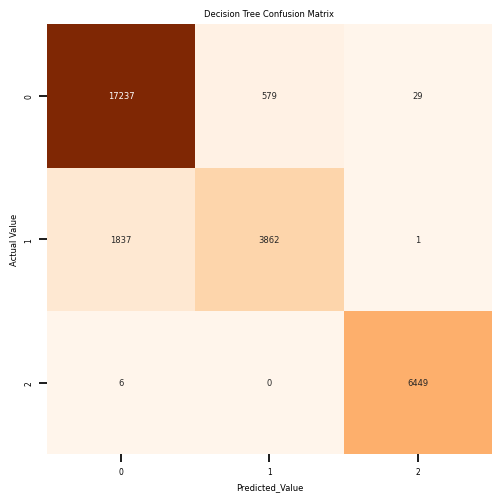

In [191]:
# Plotting the Confusion Matrix for Decision Tree Algorithm
cm_dt = confusion_matrix(y_test,best_dt.predict(x_test))
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_dt,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Decision Tree Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("Actual Value")
plt.tight_layout()

The image is a confusion matrix for a Decision Tree classifier. It provides an overview of the classifier's performance by comparing the actual and predicted values for a multi-class classification problem.

Confusion Matrix Description:

Axes:

1. X-axis (Predicted Value): Represents the predicted class labels (0, 1, 2).

2. Y-axis (Actual Value): Represents the actual class labels (0, 1, 2).

Matrix Values:

Each cell in the matrix represents the count of instances for the respective actual and predicted values.

The diagonal cells (from top left to bottom right) represent the number of correctly classified instances for each class.

Off-diagonal cells represent misclassifications.

Key Observations:

Class 0:

1. Correctly predicted: 17,237 instances (top-left cell).

2. Misclassified as Class 1: 579 instances.

3. Misclassified as Class 2: 29 instances.

Class 1:

1. Correctly predicted: 3,862 instances.

2. Misclassified as Class 0: 1,837 instances.

3. Misclassified as Class 2: 1 instance.

Class 2:

1. Correctly predicted: 6,449 instances.

2. Misclassified as Class 0: 6 instances.

3. Misclassified as Class 1: 0 instances.

Performance Analysis:

The classifier performs well for Class 0 and Class 2, with most instances correctly classified.

Class 1 has a higher misclassification rate, where 1,837 instances are incorrectly predicted as Class 0.

The model shows some confusion between Classes 0 and 1 but performs well in distinguishing Class 2.

Color Coding:

The color intensity indicates the number of instances in each cell:

Darker colors (like deep red) represent higher counts.

Lighter colors represent lower counts.

The confusion matrix is useful for evaluating the classifier's performance and understanding which classes are more frequently confused with others.

Let's create a function that consolidates each model's metrics into a dataframe, facilitating an end-to-end comparison of all models later:

In [39]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "precision_2": report["2"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "recall_2":report["2"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "f1_2":report["2"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

In [193]:
dt_evaluation = evaluate_model(best_dt, x_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,precision_2,recall_0,recall_1,recall_2,f1_0,f1_1,f1_2,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.9,0.87,1.0,0.97,0.68,1.0,0.93,0.76,1.0,0.92,0.88,0.9,0.92


<a id="rf"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 7 | Random Forest Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="rf_base"></a>
# <b><span style='color:brown'>Step 7.1 |</span><span style='color:brown'> RF Base Model Definition</span></b>

### First, let's define the base RF model:

In [194]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

<a id="rf_hp"></a>
# <b><span style='color:brown'>Step 7.2 |</span><span style='color:brown'> RF Hyperparameter Tuning</span></b>
⬆️ [Table of Contents](#contents_tabel)

In [195]:
# gini: Reduce the impurity score from the root node.
# entropy: Measures randomness in the information being processed, it uses log method which makes it more complex.
# bootstrap: sampling method that randomly select samples from dataset with replacement.
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]                                
}

In [196]:
 # Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf, param_grid_rf, x_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)   

RF Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


<a id="rf_eval"></a>
# <b><span style='color:brown'>Step 7.3 |</span><span style='color:brown'> RF Model Evaluation</span></b>
⬆️ [Table of Contents](#contents_tabel)

### Finally, I am evaluating the model's performance on the test datasets:

In [197]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17845
           1       0.90      0.81      0.85      5700
           2       0.98      1.00      0.99      6455

    accuracy                           0.94     30000
   macro avg       0.94      0.92      0.93     30000
weighted avg       0.94      0.94      0.94     30000



### The RF model's similar performance on both training and test data suggests it isn't overfitting.

In [198]:
rf_evaluation = evaluate_model(best_rf, x_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,precision_2,recall_0,recall_1,recall_2,f1_0,f1_1,f1_2,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.94,0.9,0.98,0.96,0.81,1.0,0.95,0.85,0.99,0.94,0.92,0.93,0.94


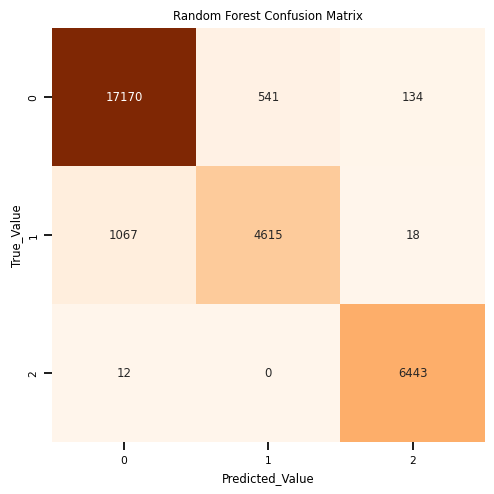

In [199]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_rf = confusion_matrix(y_test,best_rf.predict(x_test))
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 0.7)
sns.heatmap(cm_rf,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Random Forest Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

This is a confusion matrix for a Random Forest classification model, visualized as a heatmap. The matrix provides an overview of the performance of the model by comparing the true labels (actual values) with the predicted labels. Here's a breakdown of the matrix:

Rows represent the true values of the target variable.

Columns represent the predicted values output by the model.

Each value in the matrix represents the count of instances corresponding to that combination of true and predicted values.

Description of Matrix:

Class 0 (Top row):

1. 17,170 instances were correctly classified as Class 0.

2. 541 instances were misclassified as Class 1.

3. 134 instances were misclassified as Class 2.

Class 1 (Middle row):

1. 1,067 instances were misclassified as Class 0.

2. 4,615 instances were correctly classified as Class 1.

3. 18 instances were misclassified as Class 2.
Class 2 (Bottom row):

1. 12 instances were misclassified as Class 0.

2. 0 instances were misclassified as Class 1.

3. 6,443 instances were correctly classified as Class 2.

Key Observations:

The majority of instances are correctly classified, especially for Class 0 and Class 2.

There is some confusion between Class 0 and Class 1, as shown by the 541 instances misclassified from Class 0 to Class 1 and 1,067 instances misclassified from Class 1 to Class 0.
Class 2 seems to have very few misclassifications.

This confusion matrix helps evaluate the accuracy of the model, and areas with high misclassifications can indicate where improvements might be needed in terms of feature engineering or model tuning.

<a id="svm"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 8 | SVM Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="svm_base"></a>
# <b><span style='color:brown'>Step 8.1 |</span><span style='color:brown'> SVM Base Model Definition</span></b>

In [200]:
#Support Vector Machine
model_svc = SVC()

<a id="svm_hp"></a>
# <b><span style='color:brown'>Step 8.2 |</span><span style='color:brown'> SVM Hyperparameter Tuning</span></b>
⬆️ [Table of Contents](#contents_tabel)

### Let's configure the hyperparameters grid and employ the __tune_clf_hyperparameters__ function to determine the best hyperparameters for our SVM pipeline:

In [201]:
# Pipeline(): Sequence of steps that manage the flow of data.(Pre-processing, feature extraction, model fitting and validation)
# StandardScaler(): Used for Standardizing features by removing the mean and scaling to unit variance.
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC()) 
])

In [202]:
param_grid_svm = {
    'svm__C': [1.0], # Regularization parameters
    'svm__kernel': ['linear', 'rbf', 'poly']  # Kernel coefficient 
    # linear: when data is linearly seperable or has many features, rbf: used in complex & nonlinear clusters. 
}

In [203]:
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, x_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 1.0, 'svm__kernel': 'rbf'}


<a id="svm_eval"></a>
# <b><span style='color:brown'>Step 8.3 |</span><span style='color:brown'> SVM Model Evaluation</span></b>
⬆️ [Table of Contents](#contents_tabel)

### Let's evaluate our SVM model's performance on the test dataset:

In [204]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     17845
           1       0.93      0.91      0.92      5700
           2       0.95      1.00      0.97      6455

    accuracy                           0.96     30000
   macro avg       0.95      0.96      0.95     30000
weighted avg       0.96      0.96      0.96     30000



In [205]:
svm_evaluation = evaluate_model(best_svm, x_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,precision_2,recall_0,recall_1,recall_2,f1_0,f1_1,f1_2,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.97,0.93,0.95,0.96,0.91,1.0,0.97,0.92,0.97,0.95,0.96,0.95,0.96


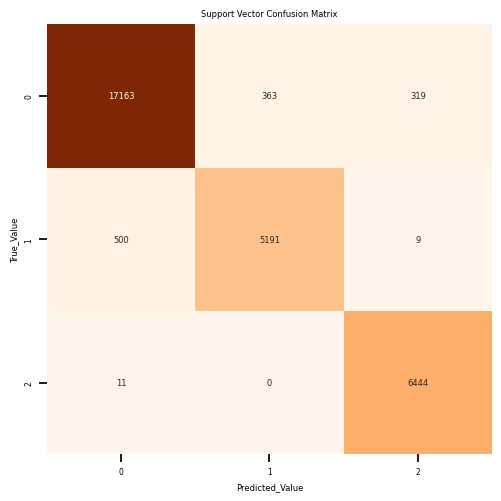

In [206]:
# Plotting the Confusion Matrix for Support Vector Classifier Algorithm
cm_svc = confusion_matrix(y_test, best_svm.predict(x_test))
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_svc,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Support Vector Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

This is a confusion matrix for a Support Vector Machine (SVM) classification model, represented as a heatmap. It compares the true labels (actual values) with the predicted labels by the model, similarly to the Random Forest confusion matrix. The breakdown is as follows:

__Breakdown of the Matrix__:

Rows represent the true values, and Columns represent the predicted values.

__Class-by-Class Description__:

__Class 0 (Top row)__:

1. 17,163 instances were correctly classified as Class 0.

2. 363 instances were misclassified as Class 1.

3. 319 instances were misclassified as Class 2.

__Class 1 (Middle row)__:

1. 500 instances were misclassified as Class 0.

2. 5,191 instances were correctly classified as Class 1.

3. 9 instances were misclassified as Class 2.

__Class 2 (Bottom row)__:

1. 11 instances were misclassified as Class 0.

2. 0 instances were misclassified as Class 1.

3. 6,444 instances were correctly classified as Class 2.

__Key Observations__:

Class 0: Has good accuracy, but there are some misclassifications to Classes 1 and 2.

Class 1: Has a solid performance, with more correct classifications and relatively fewer misclassifications compared to the Random Forest model, especially regarding Class 2.

Class 2: Shows very high accuracy, with almost no misclassifications.

<a id="xg"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 9 | XGBOOST Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="xg_base"></a>
# <b><span style='color:brown'>Step 9.1 |</span><span style='color:brown'> XGBOOST Base Model Definition</span></b>
⬆️ [Table of Contents](#contents_tabel)

In [207]:
#XG BOOST
# tree_method:'hist' = approximation tree method used in lightGBM with slight difference in implementaion
# n_jobs: controlls number of parallel threads used for training
model_XG = XGBClassifier(tree_method='hist', n_jobs=-1)

<a id="xg_hp"></a>
# <b><span style='color:brown'>Step 9.2 |</span><span style='color:brown'> XG Hyperparameter Tuning</span></b>
⬆️ [Table of Contents](#contents_tabel)

In [208]:
# Define the parameter grid
# max_depth: This controls maximum depth of the tree model
#learning_rate: It controls the step size at which the optimizer updates the weights and it helps prevent the model from overfitting the training data.
#subsample: default=1, subsample ratio of the training instances.
#colsample_bytree: It is subsample ratio of columns constructing each tree
#gamma: Controls Regularization and prevents overfittings, also controls minimum loss reduction required to create new tree split.
param_grid_xg = {
    'n_estimators': [100,150, 200], 
    'max_depth': [3, 4, 5, 6], 
    'learning_rate': [0.01,0.1, 0.2], 
    'subsample': [0.7, 0.8, 0.9], 
    'colsample_bytree': [0.7, 0.8, 0.9], 
    'gamma': [0, 0.1, 0.2]
}

In [209]:
# Call the function for hyperparameter tuning
best_xg, best_xg_hyperparams = tune_clf_hyperparameters(model_XG, param_grid_xg, x_train, y_train)
print('XG Optimal Hyperparameters: \n', best_xg_hyperparams)

XG Optimal Hyperparameters: 
 {'colsample_bytree': 0.9, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.9}


<a id="xg_eval"></a>
# <b><span style='color:brown'>Step 9.3 |</span><span style='color:brown'> XG Model Evaluation</span></b>
⬆️ [Table of Contents](#contents_tabel)

In [210]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     17845
           1       0.93      0.91      0.92      5700
           2       0.95      1.00      0.97      6455

    accuracy                           0.96     30000
   macro avg       0.95      0.96      0.95     30000
weighted avg       0.96      0.96      0.96     30000



In [211]:
xg_evaluation = evaluate_model(best_xg, x_test, y_test, 'XG')
xg_evaluation    

,precision_0,precision_1,precision_2,recall_0,recall_1,recall_2,f1_0,f1_1,f1_2,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
XG,0.98,0.96,0.99,0.98,0.93,1.0,0.98,0.94,0.99,0.98,0.97,0.97,0.98


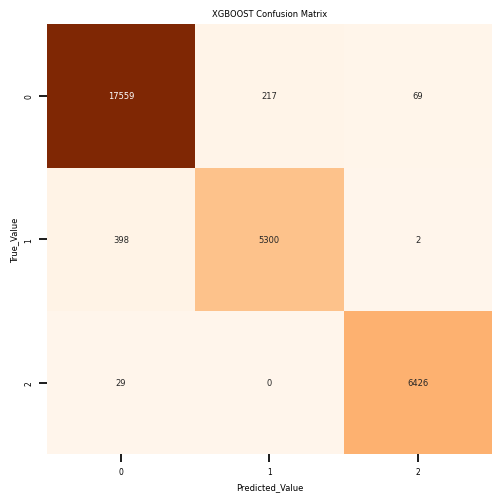

In [212]:
# Plotting the Confusion Matrix for XGBOOST Classifier Algorithm
cm_xg = confusion_matrix(y_test, best_xg.predict(x_test))
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_xg,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('XGBOOST Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

This is a confusion matrix for an XGBoost classification model, displayed as a heatmap. The matrix compares true labels with predicted labels, giving insight into the model's performance on each class.

__Breakdown of the Matrix__:

Rows represent the true values of the target variable and Columns represent the predicted values from the XGBoost model.

__Class-by-Class Description__:

Class 0 (Top row):

1. 17,559 instances were correctly classified as Class 0.

2. 217 instances were misclassified as Class 1.

3. 69 instances were misclassified as Class 2.

Class 1 (Middle row):

1. 398 instances were misclassified as Class 0.

2. 5,300 instances were correctly classified as Class 1.

3. 2 instances were misclassified as Class 2.

Class 2 (Bottom row):

1. 29 instances were misclassified as Class 0.

2. 0 instances were misclassified as Class 1.

3. 6,426 instances were correctly classified as Class 2.

__Key Observations__:

Class 0: Shows high accuracy with minimal misclassifications to Classes 1 and 2.

Class 1: Has good accuracy, with a few misclassifications to Class 0 but very few to Class 2.

Class 2: Demonstrates high precision with only 29 instances misclassified as Class 0 and no instances misclassified as Class 1.

The XGBoost model has a very high overall accuracy, with fewer misclassifications across all classes compared to the Random Forest and SVM models. It performs especially well in minimizing errors for Class 2, while Class 1 also exhibits strong performance with minimal confusion across other classes.

<a id="lr"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 10 | Logistic Regression Model Building </p>

⬆️ [Table of Contents](#contents_tabel)

<a id="lr_base"></a>
# <b><span style='color:brown'>Step 10.1 |</span><span style='color:brown'> Logistic Base Model Definition</span></b>
⬆️ [Table of Contents](#contents_tabel)

In [40]:
logistic_base=LogisticRegression()

<a id="lr_hp"></a>
# <b><span style='color:brown'>Step 10.2 |</span><span style='color:brown'> Logistic Hyperparameter Tuning </span></b>
⬆️ [Table of Contents](#contents_tabel)


In [41]:
# Define the base logistic model and set up the pipeline with scaling
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression())
])

In [42]:
# Hyperparameter grid for Logistic Regression
# penalty - determines the regularization, and helps prevent overfitting by adding a penalty to the optimization objective.
# 'l1' refers to Lasso regularization, and 'l2' refers to Ridge regularization
# 'C' - inverse of the regularization strength, smaller values specify stronger regularization
# 'solver' - algorithm used for optimization in LR,  'liblinear' is suitable for small datasets, 'saga' for larger dataset
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

<a id="lr_eval"></a>
# <b><span style='color:brown'>Step 10.3 |</span><span style='color:brown'> Logistic Model Evaluation </span></b>
⬆️ [Table of Contents](#contents_tabel)

In [43]:
# Call the function for hyperparameter tuning with logistic regression
best_logistic, best_logistic_hyperparams = tune_clf_hyperparameters(logistic_base, param_grid_logistic, x_train, y_train)

# Print the optimal hyperparameters for logistic regression
print('Logistic Regression Optimal Hyperparameters: \n', best_logistic_hyperparams)

Logistic Regression Optimal Hyperparameters: 
 {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [44]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_logistic.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     17845
           1       0.80      0.85      0.82      5700
           2       0.98      1.00      0.99      6455

    accuracy                           0.93     30000
   macro avg       0.91      0.92      0.92     30000
weighted avg       0.93      0.93      0.93     30000



In [45]:
logistic_evaluation = evaluate_model(best_logistic, x_test, y_test, 'LR')
logistic_evaluation

,precision_0,precision_1,precision_2,recall_0,recall_1,recall_2,f1_0,f1_1,f1_2,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
LR,0.95,0.8,0.98,0.92,0.85,1.0,0.94,0.82,0.99,0.91,0.92,0.92,0.93


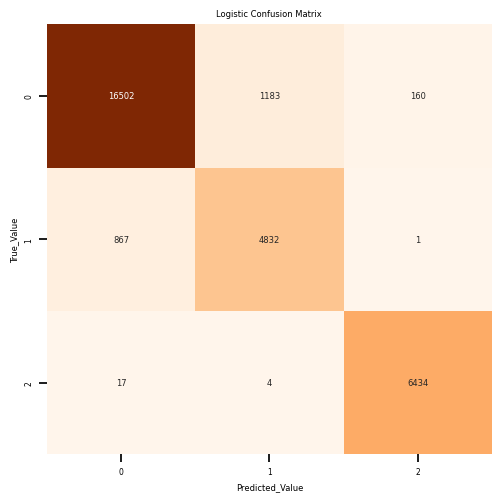

In [47]:
# Plotting the Confusion Matrix for Logistic Regression Classifier Algorithm
cm_xg = confusion_matrix(y_test, best_logistic.predict(x_test))
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_xg,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Logistic Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

This image shows the confusion matrix generated by a Logistic Regression model, which is used to evaluate its performance across three classes: 0, 1, and 2. The rows represent the actual values (True Value), and the columns represent the predicted values (Predicted Value).

__Breakdown__:

Class 0 (True Value 0):

1. Correctly predicted as 0: 16,502 times.

2. Misclassified as class 1: 1183 times.

3. Misclassified as class 2: 160 times.

Class 1 (True Value 1):

1. Misclassified as class 0: 867 times.

2. Correctly predicted as class 1: 4832 times.

3. Misclassified as class 2: 1 times.

Class 2 (True Value 2):

1. Misclassified as class 0: 17 times.

2. Misclassified as class 1: 4 times.

3. Correctly predicted as class 2: 6,434 times.

__Key observations+__:

The model performs very well for Class 2 with minimal misclassifications.

The majority of misclassifications occur between Class 1 and Class 0, where 867 instances of class 1 were incorrectly classified as class 0 and 1,183 instances of class 0 were misclassified as class 1.

Class 0 and Class 2 have high prediction accuracy, but Class 1 shows more confusion with the other classes.

This confusion matrix can be used to calculate various performance metrics like accuracy, precision, recall, and F1 score to further evaluate the model's effectiveness.

<a id="conclusion"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 11 | Conclusion</p>

⬆️ [Table of Contents](#contents_tabel)

### The Stellar Object Classification project seeks to revolutionize the field of astronomy by automating the classification of celestial objects, thus enabling faster, more accurate analysis of vast astronomical datasets. By leveraging machine learning, this project will not only streamline the classification process but also open new avenues for discovery and exploration in the cosmos.

In [220]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, svm_evaluation, xg_evaluation, logistic_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'accuracy'
results = results.sort_values(by='accuracy', ascending=False).round(2)


In [221]:
results

,precision_0,precision_1,precision_2,recall_0,recall_1,recall_2,f1_0,f1_1,f1_2,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
XG,0.98,0.96,0.99,0.98,0.93,1.00,0.98,0.94,0.99,0.98,0.97,0.97,0.98
SVM,0.97,0.93,0.95,0.96,0.91,1.00,0.97,0.92,0.97,0.95,0.96,0.95,0.96
RF,0.94,0.90,0.98,0.96,0.81,1.00,0.95,0.85,0.99,0.94,0.92,0.93,0.94
DT,0.90,0.87,1.00,0.97,0.68,1.00,0.93,0.76,1.00,0.92,0.88,0.90,0.92
LR,0.95,0.80,0.98,0.92,0.85,0.99,0.93,0.82,0.98,0.91,0.92,0.91,0.92


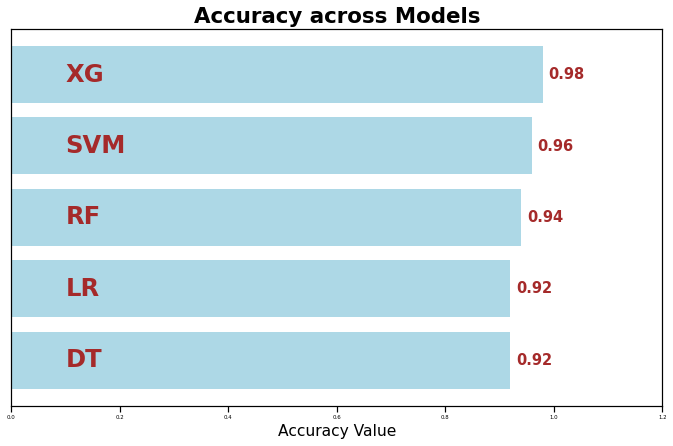

In [222]:
# Sort values based on 'Accuracy'
results.sort_values(by='accuracy', ascending=True, inplace=True)
accuracy_scores = results['accuracy']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, accuracy_scores, color='lightblue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(accuracy_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='brown', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='brown', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("Accuracy across Models", fontweight='bold', fontsize=22)
plt.xlabel('Accuracy Value', fontsize=16)
plt.show()

Use cases of confusion matrix features:

1. Accuracy: Overall correctness of the model

Example: Weather Forecasting

2. Precision: Minimize false positives (type I errors)

Example: Spam Detection

3. Recall: Minimize false negatives (type II errors)

Example: Medical Diagnosis (e.g., Cancer Detection)

4. F1-score: Balance between precision and recall, often with imbalance

Example: Fraud detection

<a id="prediction"></a>
# <p style="background-color:white; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 25px;">Step 12 | Prediction</p>

⬆️ [Table of Contents](#contents_tabel)

In [223]:
# Function to make a prediction based on user input
def predict(features):
    return best_xg.predict(np.array(features).reshape(1, -1))

# Define feature names
feature_names = ["alpha", "delta", "u", "g", "r", "i", "z", "redshift", "plate"]

# Create input widgets
feature_widgets = [widgets.FloatText(value=0.0, description=f'{feature}:') for feature in feature_names]

# Create a button for making predictions
predict_button = widgets.Button(description="Predict")

# Output widget to display prediction
output_widget = widgets.Output()

# Function to handle button click event
def on_button_click(b):
    user_input = [float(widget.value) for widget in feature_widgets]
    prediction = predict(user_input)

    # Clear the previous output and display the new prediction
    with output_widget:
        output_widget.clear_output(wait=True)  # Clear previous output
        display(HTML(f"<b>Prediction:</b> {prediction[0]}"))

# Attach the button click event
predict_button.on_click(on_button_click)

# Display widgets and output area
display(*feature_widgets, predict_button, output_widget)

# CLASS 0: GALAXY
# CLASS 1: QSO
# CLASS 2: STAR

FloatText(value=0.0, description='alpha:')

FloatText(value=0.0, description='delta:')

FloatText(value=0.0, description='u:')

FloatText(value=0.0, description='g:')

FloatText(value=0.0, description='r:')

FloatText(value=0.0, description='i:')

FloatText(value=0.0, description='z:')

FloatText(value=0.0, description='redshift:')

FloatText(value=0.0, description='plate:')

Button(description='Predict', style=ButtonStyle())

Output()